<a href="https://colab.research.google.com/github/zuzka05/stat_learn/blob/main/QuantTradingAccelerator_Part6_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quant Trading Accelerator 🚀

Learn from 0, extremely fast => JIT Learning => Build, Test, Learn, Iterate 🚀

Feedback is important!

## Part 6: Classification

array => vector => time series => matrices => multi-variate time series => model => regression => classification

Models:


*  Regression => 0.009%
*  Classification => UP, 75%



In [ ]:
# y_hat = model(x)
# orders = strategy(y_hat)
# execute(orders)

Goals:

1. Learn the classification model
2. Learn common mistakes using classification model for forecasting
3. Learn how to evaluate profitability of a classification model
4. Introduce a test statistic called Excess Predictability (Gerko Statistic)
5. Learn about decomposed returns

In [ ]:
# numerical computing library for fast calculation
import numpy as np
# data analysis library
import pandas as pd
# data visualization library
import seaborn as sns

# machine learning library
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Win rate is not profitability

### Load Data

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1qnX9GpiL5Ii1FEnHTIAzWnxNejWnilKp'
btcusdt = pd.read_csv(url, parse_dates=["open_time"], index_col='open_time')

btcusdt

,open,high,low,close,volume
open_time,,,,,
2020-11-27 00:00:00,17155.37,17418.93,17024.20,17400.00,15427.474
2020-11-27 01:00:00,17401.51,17465.00,17271.30,17309.94,16632.689
2020-11-27 02:00:00,17309.93,17328.09,17072.80,17102.38,16168.837
2020-11-27 03:00:00,17102.10,17277.86,17029.32,17084.05,13670.593
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299
...,...,...,...,...,...
2025-11-10 19:00:00,105435.90,106000.00,105354.00,105767.20,2971.178
2025-11-10 20:00:00,105767.10,106249.60,105750.30,105956.70,3483.547
2025-11-10 21:00:00,105956.70,105973.90,105202.70,105583.50,3305.325


In [ ]:
btcusdt['close_log_return'] = np.log(btcusdt['close']/btcusdt['close'].shift())
btcusdt

,open,high,low,close,volume,close_log_return
open_time,,,,,,
2020-11-27 00:00:00,17155.37,17418.93,17024.20,17400.00,15427.474,NaN
2020-11-27 01:00:00,17401.51,17465.00,17271.30,17309.94,16632.689,-0.005189
2020-11-27 02:00:00,17309.93,17328.09,17072.80,17102.38,16168.837,-0.012063
2020-11-27 03:00:00,17102.10,17277.86,17029.32,17084.05,13670.593,-0.001072
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299,-0.000263
...,...,...,...,...,...,...
2025-11-10 19:00:00,105435.90,106000.00,105354.00,105767.20,2971.178,0.003138
2025-11-10 20:00:00,105767.10,106249.60,105750.30,105956.70,3483.547,0.001790
2025-11-10 21:00:00,105956.70,105973.90,105202.70,105583.50,3305.325,-0.003528


In [ ]:
#Lags
#Previous log return in the previous time step

In [ ]:
btcusdt['close_log_return_lag_1'] = btcusdt['close_log_return'].shift()
btcusdt['close_log_return_lag_2'] = btcusdt['close_log_return'].shift(2)
btcusdt['close_log_return_lag_3'] = btcusdt['close_log_return'].shift(3)
btcusdt = btcusdt.dropna()
btcusdt[['close_log_return','close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3']]

,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3
open_time,,,,
2020-11-27 04:00:00,-0.000263,-0.001072,-0.012063,-0.005189
2020-11-27 05:00:00,0.010946,-0.000263,-0.001072,-0.012063
2020-11-27 06:00:00,0.001109,0.010946,-0.000263,-0.001072
2020-11-27 07:00:00,-0.010552,0.001109,0.010946,-0.000263
2020-11-27 08:00:00,-0.014575,-0.010552,0.001109,0.010946
...,...,...,...,...
2025-11-10 19:00:00,0.003138,-0.004455,0.006797,0.001525
2025-11-10 20:00:00,0.001790,0.003138,-0.004455,0.006797
2025-11-10 21:00:00,-0.003528,0.001790,0.003138,-0.004455


### Create Binary Classification Target

*   1 => Long => Price moves up
*   0 => Short => Price moves down

In [ ]:
#It's a probability space hence for down is 0
#Then create a target, what we're mapping is direction

In [ ]:
#map - loop over all the elements - it passes the function lambda
#lambda - what we want to do to each element
#still keep it as a column or vector
btcusdt['close_log_return_dir'] = btcusdt['close_log_return'].map(lambda x: 1 if x > 0 else 0)

/tmp/ipython-input-2685462105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcusdt['close_log_return_dir'] = btcusdt['close_log_return'].map(lambda x: 1 if x > 0 else 0)


In [ ]:
#functional programming
#positive log return is 1, negative is 0

In [ ]:
btcusdt[['close_log_return','close_log_return_dir']]

,close_log_return,close_log_return_dir
open_time,,
2020-11-27 04:00:00,-0.000263,0
2020-11-27 05:00:00,0.010946,1
2020-11-27 06:00:00,0.001109,1
2020-11-27 07:00:00,-0.010552,0
2020-11-27 08:00:00,-0.014575,0
...,...,...
2025-11-10 19:00:00,0.003138,1
2025-11-10 20:00:00,0.001790,1
2025-11-10 21:00:00,-0.003528,0


### Check Target Balance

In [ ]:
#check the values in the data
#is the data balances between 0s and 1s
#we don't want any discriminative data

In [ ]:
btcusdt['close_log_return_dir'].value_counts()

,count
close_log_return_dir,
1,22021
0,21415


### Split Data into Train/Test

In [ ]:
# time:  t0 ---- t1 ---- t2 ---- t3 ---- t4 ---- t5 ---- t6 ---- t7
# train: [===============================]
# test:                                  [=========================]

In [ ]:
def time_split(x, train_size = 0.75):
  i = int(len(x) * train_size)
  return x[:i].copy(), x[i:].copy()

btcusdt_train, btcusdt_test = time_split(btcusdt, train_size = 0.7)

In [ ]:
btcusdt_train

,open,high,low,close,volume,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_dir
open_time,,,,,,,,,,
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299,-0.000263,-0.001072,-0.012063,-0.005189,0
2020-11-27 05:00:00,17079.55,17350.00,17078.78,17267.54,13783.564,0.010946,-0.000263,-0.001072,-0.012063,1
2020-11-27 06:00:00,17267.54,17316.32,17177.00,17286.70,9598.037,0.001109,0.010946,-0.000263,-0.001072,1
2020-11-27 07:00:00,17286.70,17297.90,17040.00,17105.25,13115.712,-0.010552,0.001109,0.010946,-0.000263,0
2020-11-27 08:00:00,17106.79,17116.04,16714.92,16857.75,31574.365,-0.014575,-0.010552,0.001109,0.010946,0
...,...,...,...,...,...,...,...,...,...,...
2024-05-16 20:00:00,65152.30,65270.10,65018.70,65248.00,3804.218,0.001469,0.000934,0.001765,-0.002423,1
2024-05-16 21:00:00,65247.90,65480.00,65204.20,65429.10,4205.893,0.002772,0.001469,0.000934,0.001765,1
2024-05-16 22:00:00,65429.00,65457.00,65100.00,65389.20,4533.237,-0.000610,0.002772,0.001469,0.000934,0


In [ ]:
btcusdt_test

,open,high,low,close,volume,close_log_return,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_dir
open_time,,,,,,,,,,
2024-05-17 01:00:00,65477.9,65478.0,65061.2,65311.0,6160.987,-0.002554,0.003983,-0.002626,-0.000610,0
2024-05-17 02:00:00,65311.1,65430.0,65146.5,65351.5,4190.566,0.000620,-0.002554,0.003983,-0.002626,1
2024-05-17 03:00:00,65351.4,65850.0,65300.3,65545.2,11900.518,0.002960,0.000620,-0.002554,0.003983,1
2024-05-17 04:00:00,65545.1,65600.0,65327.7,65422.7,5906.313,-0.001871,0.002960,0.000620,-0.002554,0
2024-05-17 05:00:00,65422.8,65675.0,65400.0,65674.9,4946.005,0.003848,-0.001871,0.002960,0.000620,1
...,...,...,...,...,...,...,...,...,...,...
2025-11-10 19:00:00,105435.9,106000.0,105354.0,105767.2,2971.178,0.003138,-0.004455,0.006797,0.001525,1
2025-11-10 20:00:00,105767.1,106249.6,105750.3,105956.7,3483.547,0.001790,0.003138,-0.004455,0.006797,1
2025-11-10 21:00:00,105956.7,105973.9,105202.7,105583.5,3305.325,-0.003528,0.001790,0.003138,-0.004455,0


### Check Classification Balance of Train/Test Split

In [ ]:
#Make sure the target are still balanced after the train-test split
#If there were issues we would need to stratify
#Credit card data is naturally balanced data set
#How to deal with any imbalances?

In [ ]:
btcusdt_test['close_log_return_dir'].value_counts()

,count
close_log_return_dir,
1,6575
0,6456


In [ ]:
btcusdt_train['close_log_return_dir'].value_counts()

,count
close_log_return_dir,
1,15446
0,14959


### Train Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import os

# -------------------------------------------------------
# 0. REPRODUCIBILITY SETTINGS
# -------------------------------------------------------
SEED = 99

# Ensure Python’s hash-based operations are deterministic
os.environ["PYTHONHASHSEED"] = str(SEED)

# Set seeds for Python's built-in RNG, NumPy, and PyTorch
random.seed(SEED)
np.random.seed(SEED)

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)          # For single-GPU setups
torch.cuda.manual_seed_all(SEED)      # For multi-GPU setups


# -------------------------------------------------------
# 1. CREATE TENSORS FROM DATAFRAME **AFTER SETTING SEEDS**
# -------------------------------------------------------
#We're using logistic regressions - here use lag_3

# Input features (model predictors)
features = ['close_log_return_lag_3']

# Target variable (model output): Now using the encoded binary column
# Note: It MUST contain only 0s and 1s.
target = 'close_log_return_dir'

# Convert train/test splits into PyTorch tensors
X_train = torch.tensor(btcusdt_train[features].values, dtype=torch.float32)
X_test  = torch.tensor(btcusdt_test[features].values, dtype=torch.float32)

# Create target tensors and add a column dimension (N → N×1)
# Target must be dtype=torch.float32 for nn.BCEWithLogitsLoss
#unsqueeze - get it from a column vector to a row-vector
y_train = torch.tensor(btcusdt_train[target].values, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(btcusdt_test[target].values, dtype=torch.float32).unsqueeze(1)


# -------------------------------------------------------
# 2. DEFINE MODEL (Logistic Regression)
# -------------------------------------------------------

# Number of input features (1 in this case)
no_features = len(features)

# Define the Logistic Regression Model
# Logistic Regression is a simple linear layer that outputs logits (Wx + b).
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        # Output the raw scores (logits)
        return self.linear(x)

model = LogisticRegression(no_features)

# Loss Function: Binary Cross-Entropy with Logits
# This loss function is numerically stable because it combines the Sigmoid activation
# and the Binary Cross-Entropy loss.
#Different loss function - specific for classification
criterion = nn.BCEWithLogitsLoss()

# Stochastic Gradient Descent optimizer (kept the same)
optimizer = optim.SGD(model.parameters(), lr=0.01)


# -------------------------------------------------------
# 3. TRAINING LOOP (FULL-BATCH GRADIENT DESCENT)
# -------------------------------------------------------
#That's the training where learning is done
#We need to zero-out the gradients because they accumulate
#Every trianing loop set to 0
for epoch in range(9000):

    # Clear previously stored gradients
    optimizer.zero_grad()

    # Forward pass: compute **logits** (raw, unnormalized output)
    y_pred_logits = model(X_train)

    # Compute loss between logits and true binary values (0s/1s)
    #update the parameters wrt loss
    loss = criterion(y_pred_logits, y_train)

    # Backpropagation: compute gradients
    loss.backward()

    # Update model parameters wrt loss
    optimizer.step()

    # Print loss every 500 epochs
    #Each training loop is an epoch
    #All losses should be minimized
    #Do maths to turn it into minimization problem or loss
    if epoch % 500 == 0:
        # Since the loss calculation involves log, it will be a positive value close to 0
        # for good models, but unlike MSE, it doesn't represent squared error.
        print("Epoch:", epoch, "Loss:", loss.item())


# -------------------------------------------------------
# 4. CHECK TRAINED PARAMETERS
# -------------------------------------------------------
# The final weight and bias are the parameers of the linear boundary Wx + b.
print("\nFinal weight:", model.linear.weight.data)
print("Final bias:", model.linear.bias.data)

# -------------------------------------------------------
# 4. EVALUATION ON WHOLE TEST SET
# -------------------------------------------------------

# 1. Get the logits (raw scores) for the entire test set
# We wrap this in torch.no_grad() to save memory and computations,
# as we are not training (calculating gradients).
with torch.no_grad():
    y_pred_logits = model(X_test)

    # 2. Convert logits to probabilities (0 to 1) using Sigmoid
    #An activiation function -> converts into proobability
    y_pred_proba = torch.sigmoid(y_pred_logits)

    # 3. Convert probabilities to hard binary predictions (0 or 1)
    # The classification threshold is 0.5 (or a logit of 0).
    # If P >= 0.5, we predict 1 (up), otherwise 0 (down).
    y_pred_binary = (y_pred_proba >= 0.5).float()

# -------------------------------------------------------
# 5. CALCULATE METRICS
# -------------------------------------------------------

# Convert PyTorch tensors to NumPy arrays for easy metric calculation
y_test_np = y_test.squeeze().numpy()
y_pred_binary_np = y_pred_binary.squeeze().numpy()
y_pred_proba_np = y_pred_proba.squeeze().numpy()

# Directional Accuracy (DA) / Classification Accuracy
# Calculated as (Correct Predictions) / (Total Predictions)
accuracy = np.mean(y_pred_binary_np == y_test_np)

# Count of Buy Signals (Predicted 1)
buy_signals = np.sum(y_pred_binary_np == 1)

print("\n--- Model Evaluation ---")
print(f"Total Test Samples (T): {len(X_test)}")
print(f"Number of Buy Signals (Predicted UP): {int(buy_signals)}")
print(f"Directional Accuracy (DA): {accuracy:.4f}")

Epoch: 0 Loss: 0.7922163605690002
Epoch: 500 Loss: 0.7019873857498169
Epoch: 1000 Loss: 0.6936994194984436
Epoch: 1500 Loss: 0.6930115222930908
Epoch: 2000 Loss: 0.6929551362991333
Epoch: 2500 Loss: 0.692950427532196
Epoch: 3000 Loss: 0.6929500699043274
Epoch: 3500 Loss: 0.6929500102996826
Epoch: 4000 Loss: 0.6929499506950378
Epoch: 4500 Loss: 0.6929499506950378
Epoch: 5000 Loss: 0.6929499506950378
Epoch: 5500 Loss: 0.6929497718811035
Epoch: 6000 Loss: 0.6929497718811035
Epoch: 6500 Loss: 0.6929497718811035
Epoch: 7000 Loss: 0.6929497718811035
Epoch: 7500 Loss: 0.6929497122764587
Epoch: 8000 Loss: 0.692949652671814
Epoch: 8500 Loss: 0.6929495930671692

Final weight: tensor([[-0.8009]])
Final bias: tensor([0.0321])

--- Model Evaluation ---
Total Test Samples (T): 13031
Number of Buy Signals (Predicted UP): 13027
Directional Accuracy (DA): 0.5046


In [ ]:
#Don't dismiss it straight away
#Evaluate the predictability of it

### Evaluate Model's Predicability (Out-of-sample)

### Add model out-of-sample predictions

In [ ]:
btcusdt_test['y_pred_binary'] = y_pred_binary_np
btcusdt_test['y_pred_proba'] = y_pred_proba_np

In [ ]:
btcusdt_test[['close_log_return','y_pred_binary','y_pred_proba']]

,close_log_return,y_pred_binary,y_pred_proba
open_time,,,
2024-05-17 01:00:00,-0.002554,1.0,0.508140
2024-05-17 02:00:00,0.000620,1.0,0.508543
2024-05-17 03:00:00,0.002960,1.0,0.507220
2024-05-17 04:00:00,-0.001871,1.0,0.508529
2024-05-17 05:00:00,0.003848,1.0,0.507893
...,...,...,...
2025-11-10 19:00:00,0.003138,1.0,0.507712
2025-11-10 20:00:00,0.001790,1.0,0.506657
2025-11-10 21:00:00,-0.003528,1.0,0.508909


### Encode Directional Signal

*   1 => Go Long => Bet Price Goes Up
*   -1 => Go Short => Bet Price Goes Down

In [ ]:
#Map the 0s to -1
#dir_signal -> y_pred_binary

In [ ]:
#An array of booleans
btcusdt_test['dir_signal'] = np.where(btcusdt_test['y_pred_binary'] == 1, 1, -1)

In [ ]:
btcusdt_test[['close_log_return','dir_signal','y_pred_binary','y_pred_proba']]

,close_log_return,dir_signal,y_pred_binary,y_pred_proba
open_time,,,,
2024-05-17 01:00:00,-0.002554,1,1.0,0.500302
2024-05-17 02:00:00,0.000620,1,1.0,0.518477
2024-05-17 03:00:00,0.002960,1,1.0,0.508978
2024-05-17 04:00:00,-0.001871,1,1.0,0.500734
2024-05-17 05:00:00,0.003848,1,1.0,0.513161
...,...,...,...,...
2025-11-10 19:00:00,0.003138,1,1.0,0.515478
2025-11-10 20:00:00,0.001790,-1,0.0,0.497862
2025-11-10 21:00:00,-0.003528,1,1.0,0.503283


### Evaluate Prediction Balance (Directional Distribution)

In [ ]:
#No discriminative ability
#No predictive power
#Just buy and hold

In [ ]:
btcusdt_test['dir_signal'].value_counts()

,count
dir_signal,
1,13027
-1,4


### Evaluate Model's Profitiability

In [ ]:
#Take the cumulative sum
#Log returns are additive
#Do the cum sum
#You model at a compound growth - reinvest all the profits from the previous trading periods into future

In [ ]:
btcusdt_test['trade_log_return'] = btcusdt_test['dir_signal'] * btcusdt_test['close_log_return']

<Axes: xlabel='open_time'>

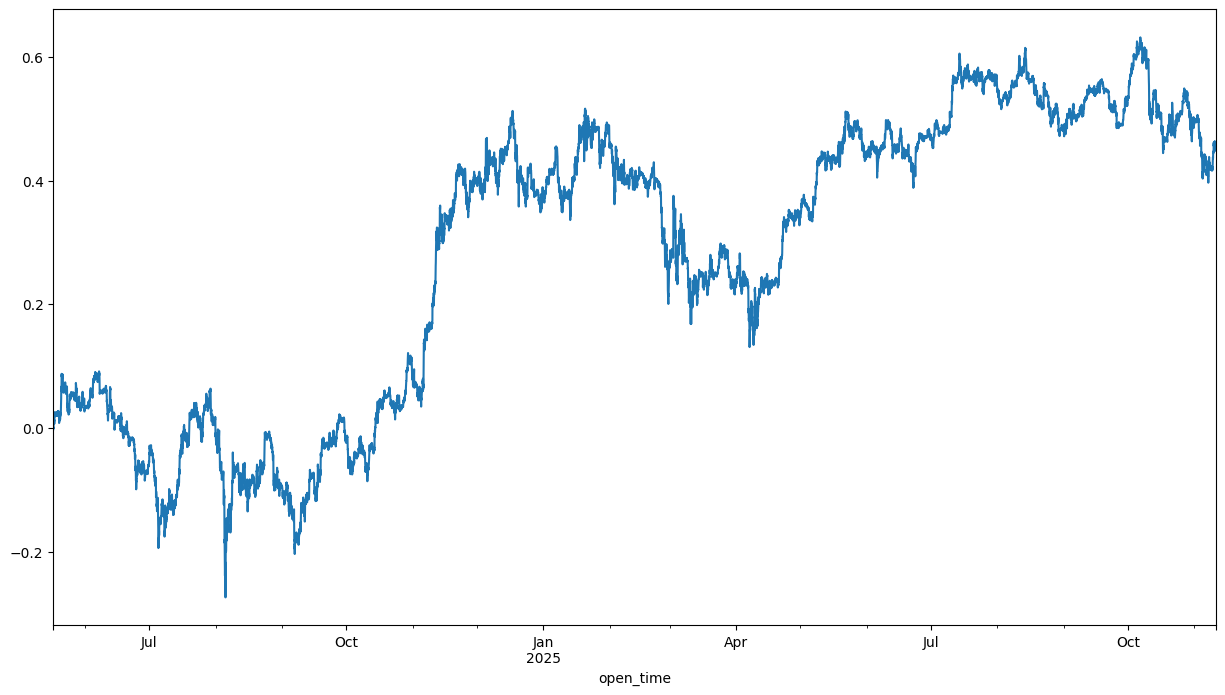

In [ ]:
btcusdt_test['trade_log_return'].cumsum().plot(figsize=(15,8))

In [ ]:
#It is idential to equity curve

<Axes: xlabel='open_time'>

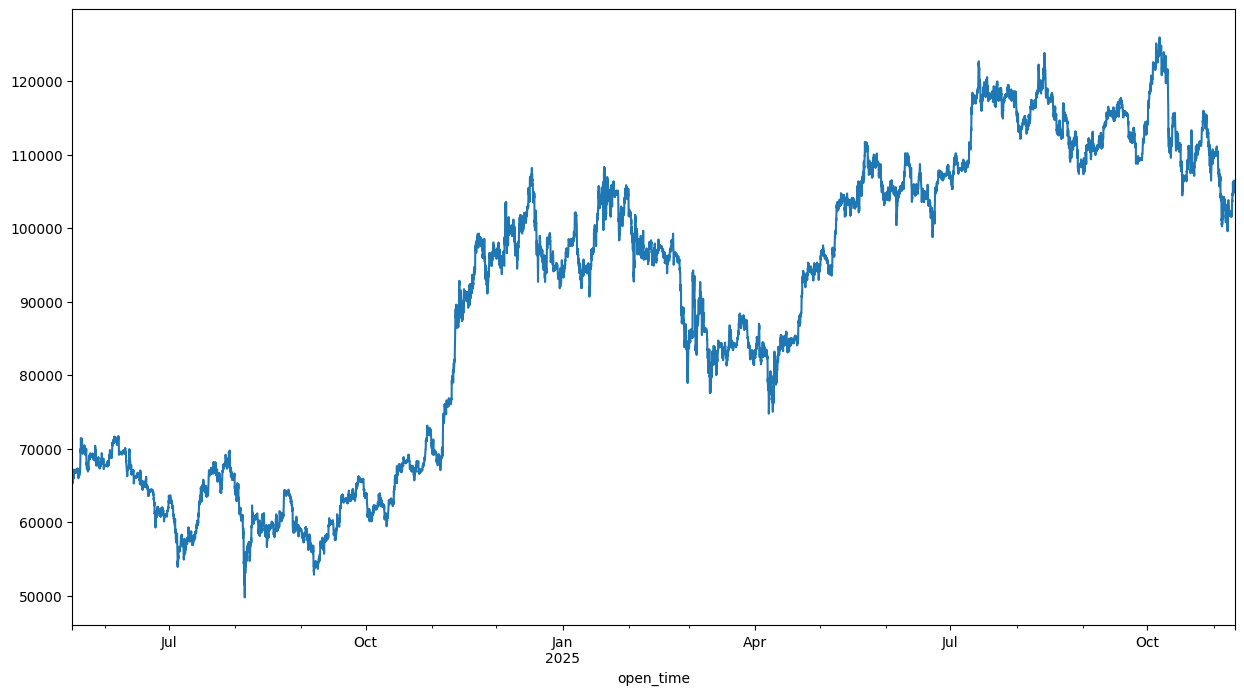

In [ ]:
btcusdt_test['close'].plot(figsize=(15,8))

No Discriminative Power == No Predictive Power

In [ ]:
#We want both predictive and profitable

### Research new model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import os
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------
# 0. REPRODUCIBILITY SETTINGS
# -------------------------------------------------------
SEED = 99
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# -------------------------------------------------------
# 1. STANDARDIZE FEATURES AND CREATE TENSORS
# -------------------------------------------------------

features = ['close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3']
target = 'close_log_return_dir'

# Fit scaler on training set only
scaler = StandardScaler()
#multi-variate -> we want to scale it
#normalize it, shrink it to a smaller number
#ML is very sensitive to smaller number, you get vanishing gradients
#Large numbers another features moves a bit -> exploding gradients
#do scaler on the train and test
X_train_scaled = scaler.fit_transform(btcusdt_train[features].values)
X_test_scaled  = scaler.transform(btcusdt_test[features].values)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test  = torch.tensor(X_test_scaled,  dtype=torch.float32)

y_train = torch.tensor(btcusdt_train[target].values, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(btcusdt_test[target].values, dtype=torch.float32).unsqueeze(1)

# -------------------------------------------------------
# 2. DEFINE MODEL (Logistic Regression)
# -------------------------------------------------------

no_features = len(features)

class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

model = LogisticRegression(no_features)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# -------------------------------------------------------
# 3. TRAINING LOOP (FULL-BATCH GRADIENT DESCENT)
# -------------------------------------------------------

#when have more features, increase the training time
#scale the data
#increase the loop size
for epoch in range(15000):
    optimizer.zero_grad()
    y_pred_logits = model(X_train)
    loss = criterion(y_pred_logits, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print("Epoch:", epoch, "Loss:", loss.item())

# -------------------------------------------------------
# 4. CHECK TRAINED PARAMETERS
# -------------------------------------------------------
print("\nFinal weight:", model.linear.weight.data)
print("Final bias:", model.linear.bias.data)

# -------------------------------------------------------
# 5. EVALUATION ON TEST SET
# -------------------------------------------------------
with torch.no_grad():
    y_pred_logits = model(X_test)
    y_pred_proba = torch.sigmoid(y_pred_logits)
    y_pred_binary = (y_pred_proba >= 0.5).float()

y_test_np = y_test.squeeze().numpy()
y_pred_binary_np = y_pred_binary.squeeze().numpy()
y_pred_proba_np = y_pred_proba.squeeze().numpy()

# Metrics
accuracy = np.mean(y_pred_binary_np == y_test_np)
buy_signals = np.sum(y_pred_binary_np == 1)

print("\n--- Model Evaluation ---")
print(f"Total Test Samples (T): {len(X_test)}")
print(f"Number of Buy Signals (Predicted UP): {int(buy_signals)}")
print(f"Directional Accuracy (DA): {accuracy:.4f}")

# Optional: confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_np, y_pred_binary_np)
print("\nConfusion Matrix:\n", cm)


Epoch: 0 Loss: 0.806926965713501
Epoch: 500 Loss: 0.7886935472488403
Epoch: 1000 Loss: 0.772722065448761
Epoch: 1500 Loss: 0.7588532567024231
Epoch: 2000 Loss: 0.7469183802604675
Epoch: 2500 Loss: 0.736742377281189
Epoch: 3000 Loss: 0.7281467914581299
Epoch: 3500 Loss: 0.7209532260894775
Epoch: 4000 Loss: 0.7149870991706848
Epoch: 4500 Loss: 0.7100816965103149
Epoch: 5000 Loss: 0.7060809135437012
Epoch: 5500 Loss: 0.7028420567512512
Epoch: 6000 Loss: 0.7002375721931458
Epoch: 6500 Loss: 0.6981555223464966
Epoch: 7000 Loss: 0.6964994072914124
Epoch: 7500 Loss: 0.6951876282691956
Epoch: 8000 Loss: 0.694152295589447
Epoch: 8500 Loss: 0.6933372616767883
Epoch: 9000 Loss: 0.6926972270011902
Epoch: 9500 Loss: 0.6921952962875366
Epoch: 10000 Loss: 0.6918020844459534
Epoch: 10500 Loss: 0.6914945244789124
Epoch: 11000 Loss: 0.6912540793418884
Epoch: 11500 Loss: 0.6910660266876221
Epoch: 12000 Loss: 0.6909191012382507
Epoch: 12500 Loss: 0.6908043026924133
Epoch: 13000 Loss: 0.6907145977020264
Ep

In [ ]:
#the weights are decaying
#MR model
#confusion matrix -> the dist of the predictions
#want to evaluate the predictability and performance

### Evaluate Out-Of-Sample Model's Performance

In [ ]:
from sklearn.metrics import confusion_matrix

# Use scikit-learn's built-in function
cm = confusion_matrix(y_test_np, y_pred_binary_np)

cm

array([[1658, 4798],
       [1449, 5126]])

In [ ]:
TN = cm[0][0] #True DOWN
FN = cm[1][0] #False DOWN
FP = cm[0][1] #False UP
TP = cm[1][1] #True UP

### Evaluate Win Rate

In [ ]:
(TP + TN) / (TP + TN + FP + FN)

np.float64(0.5206047118409945)

### Evaluate Up Predictability

In [ ]:
TP / (TP + FP)

np.float64(0.5165255945183393)

### Evaluate Up Accuracy (Precision)

In [ ]:
#When it predicts up, 77% of time it is accurate

In [ ]:
TP / (TP + FN)

np.float64(0.7796197718631178)

### Evaluate Down Predictability

In [ ]:
#Out of the times it went down, 53% correct

In [ ]:
TN / (TN + FN)

np.float64(0.53363373028645)

### Evaluate Down Accuracy (Precision)

In [ ]:
TN / (TN + FP)

np.float64(0.25681536555142503)

In [ ]:
#Meta-Learning
#Take directions of each

### Directional Balance: Short Ratio

In [ ]:
short_ratio = (FN + TN) / (FN + TN + TP + FP)

In [ ]:
short_ratio

np.float64(0.2384314327373187)

### Directional Balance: Long Ratio

In [ ]:
long_ratio = (FP + TP) / (FN + TN + TP + FP)

In [ ]:
long_ratio

np.float64(0.7615685672626813)

### Directional Imbalance

In [ ]:
short_ratio / long_ratio

np.float64(0.3130794034663442)

### Evaluate ROC AUC

In [ ]:
#The discriminative ability
#The higher the number, the more discriminative ability (1) -> good in predicting everything

In [ ]:
#It is normalized too

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_pred_binary_np)
auc

np.float64(0.5182175687072714)

< 0.5 => worse than random guessing
0.5 => random guessing
1.0 => perfect discriminate ability

In [ ]:
# 1. Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary_np)

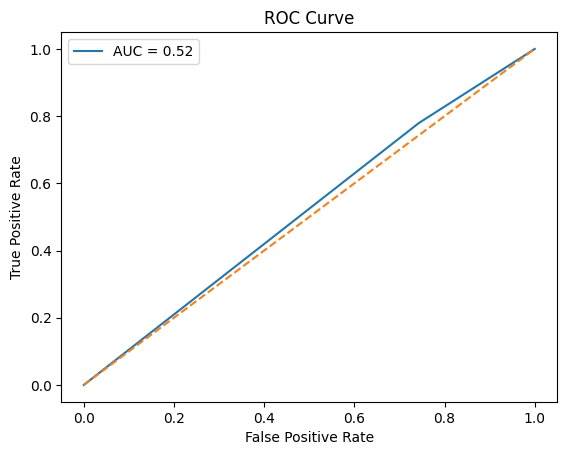

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
#Under orange -> worse than random guessing

## Evaluate Model's Profitability (Out-of-sample)

In [ ]:
btcusdt_test['y_pred_binary'] = y_pred_binary_np
btcusdt_test['y_pred_proba'] = y_pred_proba_np

In [ ]:
#look at sign (went up/down) -> close_log_return
#how was the predictive probability

In [ ]:
btcusdt_test[['close_log_return','y_pred_binary','y_pred_proba']]

,close_log_return,y_pred_binary,y_pred_proba
open_time,,,
2024-05-17 01:00:00,-0.002554,1.0,0.500302
2024-05-17 02:00:00,0.000620,1.0,0.518477
2024-05-17 03:00:00,0.002960,1.0,0.508978
2024-05-17 04:00:00,-0.001871,1.0,0.500734
2024-05-17 05:00:00,0.003848,1.0,0.513161
...,...,...,...
2025-11-10 19:00:00,0.003138,1.0,0.515478
2025-11-10 20:00:00,0.001790,0.0,0.497862
2025-11-10 21:00:00,-0.003528,1.0,0.503283


### Add Directional Signal

In [ ]:
btcusdt_test['dir_signal'] = np.where(btcusdt_test['y_pred_binary'] == 1, 1, -1)
btcusdt_test[['close_log_return','dir_signal','y_pred_binary','y_pred_proba']]

,close_log_return,dir_signal,y_pred_binary,y_pred_proba
open_time,,,,
2024-05-17 01:00:00,-0.002554,1,1.0,0.500302
2024-05-17 02:00:00,0.000620,1,1.0,0.518477
2024-05-17 03:00:00,0.002960,1,1.0,0.508978
2024-05-17 04:00:00,-0.001871,1,1.0,0.500734
2024-05-17 05:00:00,0.003848,1,1.0,0.513161
...,...,...,...,...
2025-11-10 19:00:00,0.003138,1,1.0,0.515478
2025-11-10 20:00:00,0.001790,-1,0.0,0.497862
2025-11-10 21:00:00,-0.003528,1,1.0,0.503283


### Add Trade Log Return

In [ ]:
btcusdt_test['trade_log_return'] = btcusdt_test['dir_signal'] * btcusdt_test['close_log_return']

In [ ]:
btcusdt_test[['close_log_return','dir_signal','y_pred_binary','y_pred_proba','trade_log_return']]

,close_log_return,dir_signal,y_pred_binary,y_pred_proba,trade_log_return
open_time,,,,,
2024-05-17 01:00:00,-0.002554,1,1.0,0.500302,-0.002554
2024-05-17 02:00:00,0.000620,1,1.0,0.518477,0.000620
2024-05-17 03:00:00,0.002960,1,1.0,0.508978,0.002960
2024-05-17 04:00:00,-0.001871,1,1.0,0.500734,-0.001871
2024-05-17 05:00:00,0.003848,1,1.0,0.513161,0.003848
...,...,...,...,...,...
2025-11-10 19:00:00,0.003138,1,1.0,0.515478,0.003138
2025-11-10 20:00:00,0.001790,-1,0.0,0.497862,-0.001790
2025-11-10 21:00:00,-0.003528,1,1.0,0.503283,-0.003528


### Add Compound Growth Returns

In [ ]:
#What's the EV? What is the win rate vs loss
#What's the balance between ups and downs
#Drawdown it goes into a negative equity

In [ ]:
#Add log returns togethers - that's a compound growth rate

In [ ]:
btcusdt_test['cum_trade_log_return'] = btcusdt_test['trade_log_return'].cumsum()

<Axes: xlabel='open_time'>

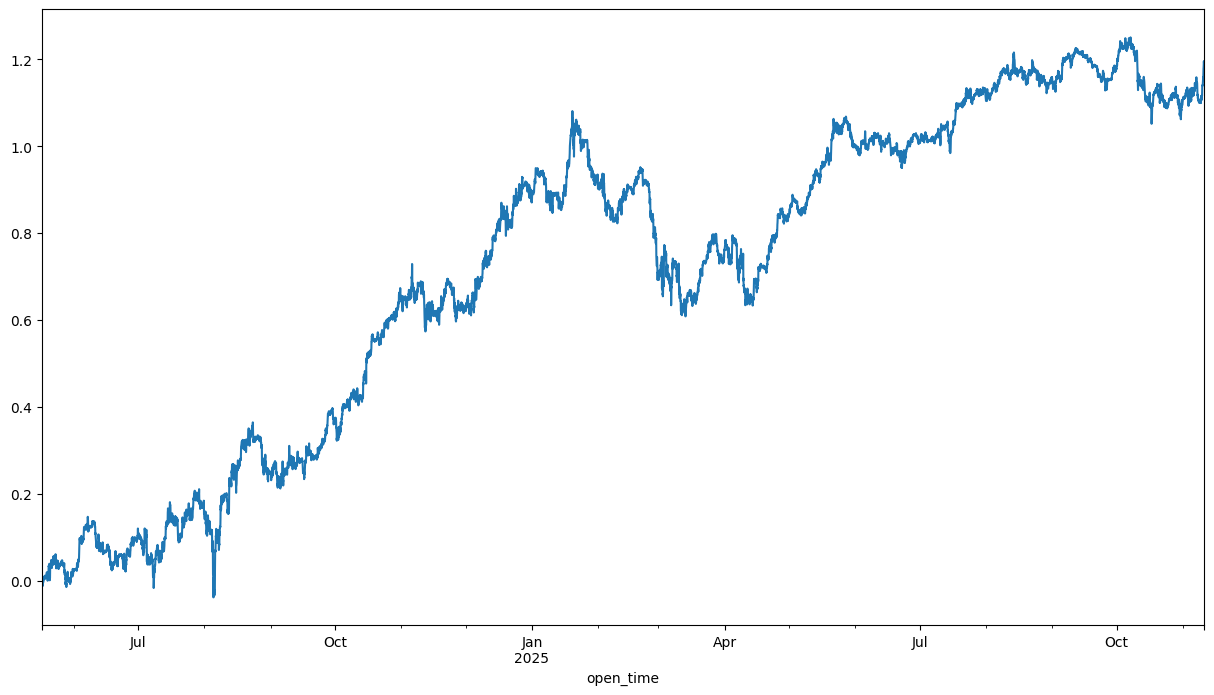

In [ ]:
btcusdt_test['cum_trade_log_return'].plot(figsize=(15,8))

<Axes: xlabel='open_time'>

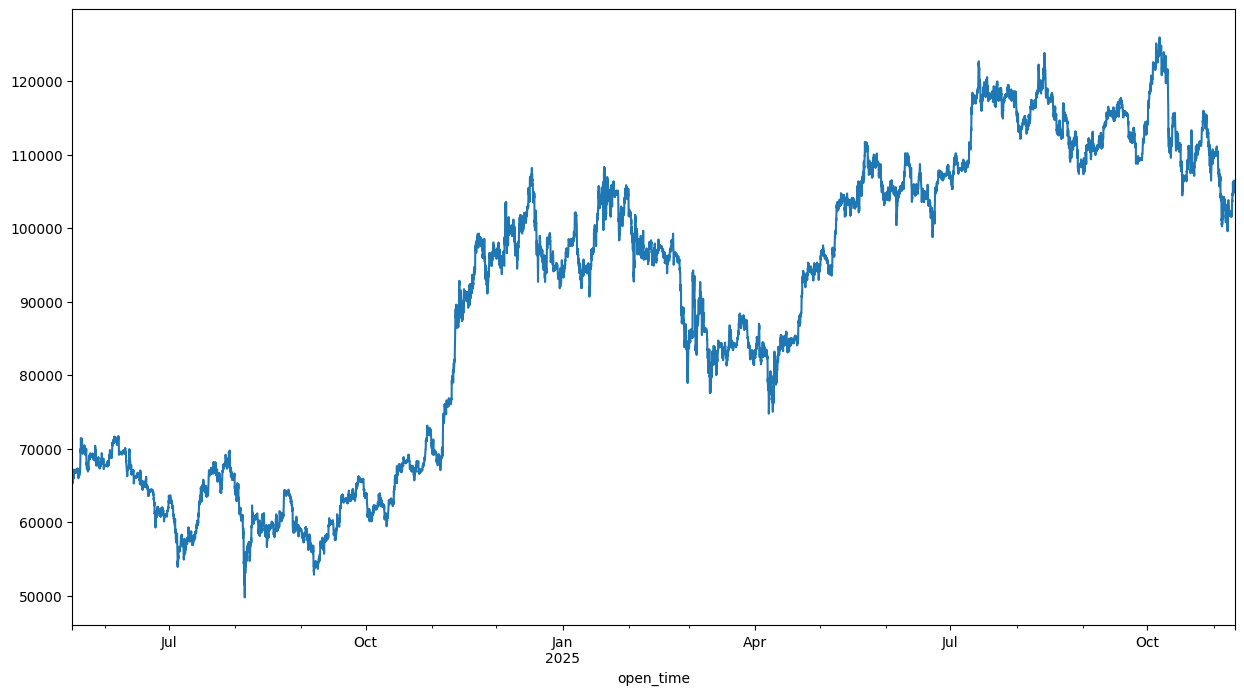

In [ ]:
btcusdt_test['close'].plot(figsize=(15,8))

In [ ]:
#returns are independent of scale
#there's a capacity on each HFT trade
#how much liquidity is available on the order book

### Display Equity Curve

In [ ]:
#Evaluate net P/L when looking at the strategy
#Convert the log return to normal by exp
#52% win rate
#put a trade every minute and hold 1 hour

In [ ]:
initial_capital = 100

In [ ]:
btcusdt_test['trade_gross_pnl'] = np.exp(btcusdt_test['cum_trade_log_return']) * initial_capital

<Axes: xlabel='open_time'>

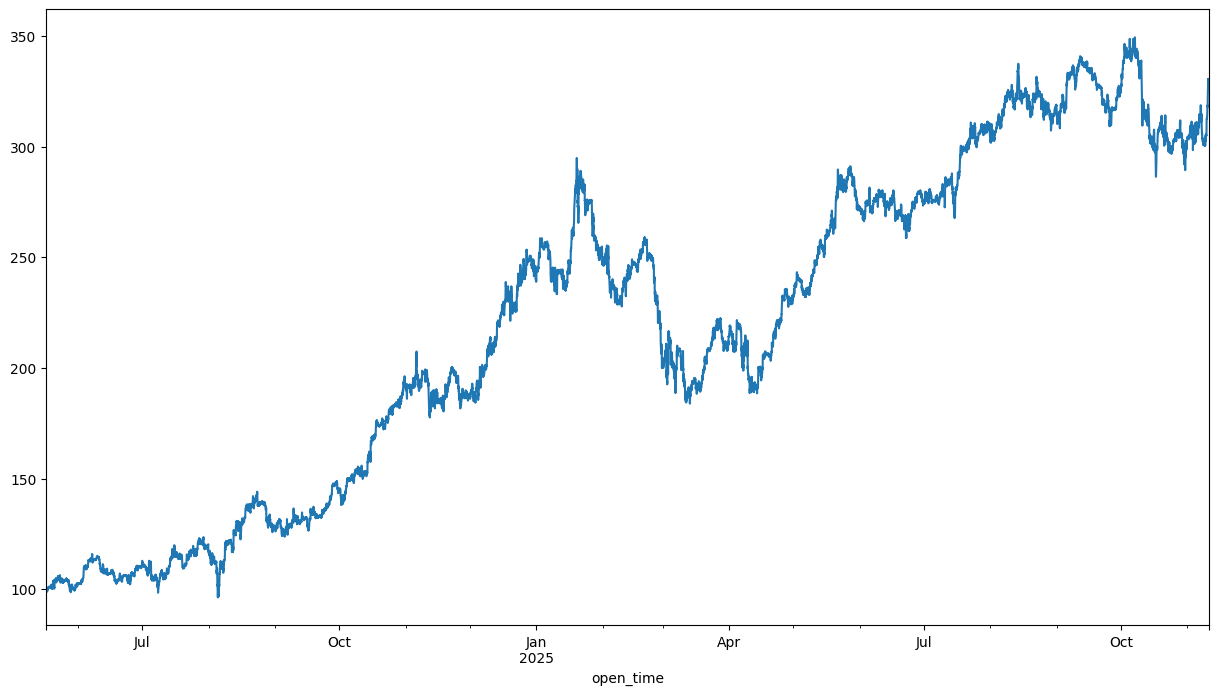

In [ ]:
btcusdt_test['trade_gross_pnl'].plot(figsize=(15,8))

### Evaluate Sharpe Ratio

In [ ]:
#What time-scale are we looking at
#Comparing days, hours, minutes
#We want independent of a time horizon
#Compare Sharp weekly, daily etc
#Sharp doesn't have to correlate with returns
#It reduces risk (drawdowns)
#If you have a stat edge, you know you'll make money
#Evaluate a total compound return

In [ ]:
btcusdt_test['trade_log_return'].mean() / btcusdt_test['trade_log_return'].std()

np.float64(0.018411314642587787)

In [ ]:
days_in_year = 365
hours_in_day = 24
t = days_in_year * hours_in_day

btcusdt_test['trade_log_return'].mean() / btcusdt_test['trade_log_return'].std() * np.sqrt(t)

np.float64(1.7232046309614244)

### Evaluate Total Compound Return

In [ ]:
total_compound_return = np.exp(btcusdt_test['trade_log_return'].sum())
total_compound_return

np.float64(3.3026428497060145)

### Evaluate Gross P&L

In [ ]:
#As a maker strategy, lower fees, higher SR add liquidity
#A taker strategy, high fees, take liqduity

In [ ]:
total_compound_return * initial_capital

np.float64(330.26428497060147)

### Evaluate Excess Predictability (Gerko Statistic)

In [ ]:
#A similar to ROC curve (discriminative ability)
#Benchmark - how much predictable it is compared to random guessing
#How much more predictability there is than random guess

### Create Benchmark Strategy (Random Guess)

In [ ]:
#Then need to convert it to directional signal
#Passing the seed from the previous model, to get the same signal
# Generate random integers 0 or 1
rng = np.random.default_rng(SEED)
random_binary = rng.integers(
    low=0,
    high=2, # Generates integers up to, but not including, 2 (i.e., 0 or 1)
    size=len(btcusdt_test)
)

# Convert 0/1 to -1/1
btcusdt_test['random_dir_signal'] = random_binary * 2 - 1
btcusdt_test['random_dir_signal']

,random_dir_signal
open_time,
2024-05-17 01:00:00,1
2024-05-17 02:00:00,1
2024-05-17 03:00:00,1
2024-05-17 04:00:00,1
2024-05-17 05:00:00,-1
...,...
2025-11-10 19:00:00,-1
2025-11-10 20:00:00,1
2025-11-10 21:00:00,1


In [ ]:
#for random trade - what's the return on it?
btcusdt_test['random_trade_log_return'] = btcusdt_test['random_dir_signal'] * btcusdt_test['close_log_return']

In [ ]:
btcusdt_test[['close_log_return','random_dir_signal','random_trade_log_return']]

,close_log_return,random_dir_signal,random_trade_log_return
open_time,,,
2024-05-17 01:00:00,-0.002554,1,-0.002554
2024-05-17 02:00:00,0.000620,1,0.000620
2024-05-17 03:00:00,0.002960,1,0.002960
2024-05-17 04:00:00,-0.001871,1,-0.001871
2024-05-17 05:00:00,0.003848,-1,-0.003848
...,...,...,...
2025-11-10 19:00:00,0.003138,-1,-0.003138
2025-11-10 20:00:00,0.001790,1,0.001790
2025-11-10 21:00:00,-0.003528,1,-0.003528


In [ ]:
#Loosing an inital capital after
#That's our benchmark - what we need to beat

<Axes: xlabel='open_time'>

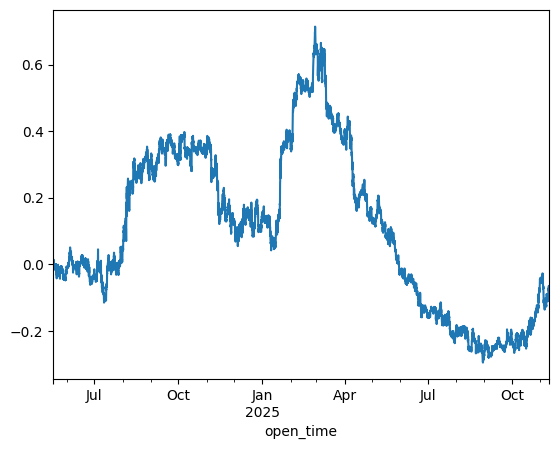

In [ ]:
btcusdt_test['cum_random_trade_log_return'] = btcusdt_test['random_trade_log_return'].cumsum()
btcusdt_test['cum_random_trade_log_return'].plot()

In [ ]:
#How much more predictable it is over time over a random number guess
#When it's negative it means it doesn't have any predictability
#99% it has better predictability
#You can be changing the benchmark - each time period you buy
#What's the excess predictability wrt to it

<Axes: xlabel='open_time'>

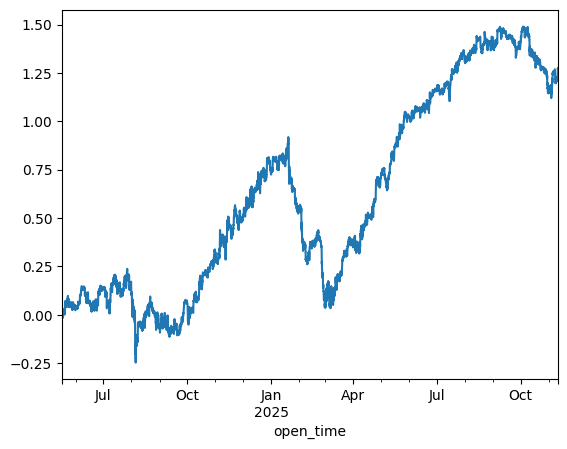

In [ ]:
excess_predictability = btcusdt_test['cum_trade_log_return'] - btcusdt_test['cum_random_trade_log_return']

excess_predictability.plot()

In [ ]:
btcusdt_test['trade_log_return'].sum() - btcusdt_test['random_trade_log_return'].sum()

np.float64(1.2737121636362085)

### Decomposition (Anatolyev)

In [ ]:
#The classifier we built is predicting a sign

#Model returns as a sign (-1 or 1) and  multiplies it by an absolute signs of all returns
#Ultimately decompose them
#Extend the classification further by predicting the future absolute size

$ \text{sign}(y_t) \cdot |y_t| = y_t $

$ \text{sign}(y_t) = direction $

$ |y_t| = magnitude $

In [ ]:
#It can give us more predictability using decomposition
#Using logistic classification and linear regression capture some non-linearities

In [ ]:
abs(-10)

10

In [ ]:
abs(10)

10

In [ ]:
dir = -1
magnitude = 5
dir * magnitude

-5

In [ ]:
#Use classifier to predict the absolute size (predict the magnitude)
#Compare the excess predictive ability vs normal classifier

### Next Videos



1.   Back-testing (Cross-validation, test stats)
2.   Strategy



### Exercises

### Exercise 1: Excess Profitability

In [ ]:
### Create a test statistic called Excess Profitability

In [ ]:
# Compare the model's profitability over buy & hold (hodl)
#The return over the return of B&H

In [ ]:
rng = np.random.default_rng(SEED)
random_binary = rng.integers(
    low=0,
    high=2,
    size=len(btcusdt_test)
)

In [ ]:
btcusdt_test['random_dir_signal'] = random_binary * 2 - 1

In [ ]:
btcusdt_test['random_dir_signal'].head()

In [ ]:
btcusdt_test['random_trade_log_return'] = btcusdt_test['random_dir_signal'] * btcusdt_test['close_log_return']

In [ ]:
btcusdt_test['cum_random_trade_log_return'] = btcusdt_test['random_trade_log_return'].cumsum()

In [ ]:
btcusdt_test['cum_random_trade_log_return'].plot()

In [ ]:
excess_predictability = btcusdt_test['cum_trade_log_return'] - btcusdt_test['cum_random_trade_log_return']

excess_predictability.plot()

In [ ]:
btcusdt_test['trade_log_return'].sum() - btcusdt_test['random_trade_log_return'].sum()

### Exercise 2: Create regression model for future absolute size of log returns

In [ ]:
#Predict the sign and absolute size

### Exercise 3: Use classification model and regression model to predict future decomposed log return

$ \text{sign}(y_t) \cdot |y_t| = y_t $